In [205]:
!pip install graphviz
!pip install transformers
!pip install bert
!pip install bert-tensorflow
!pip install keras
!pip install dask_ml
!pip install xgboost

     |████████████████████████████████| 157.5 MB 22 kB/s /s eta 0:00:01


In [1]:
# Import relevent packages
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle

# Import dask packages
import dask.dataframe as ddf
from math import nan
import panel as pn
import dask
import dask.array as da
import dask.dataframe as dd
from dask.delayed import delayed
import seaborn as sns
import matplotlib.pyplot as plt
from dask_ml.model_selection import train_test_split
import graphviz
from datascroller import scroll

from dask.diagnostics import ProgressBar
ProgressBar().register()

# text processing libraries
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import json
import os
import sys
import tensorflow as tf

import transformers as ppb
from time import time
import io
import re
from csv import reader

import bert
# from bert import run_classifier
# from bert import optimization
from bert import tokenization
from transformers import RobertaTokenizer, TFRobertaModel

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from tensorflow import keras
#### if use tensorflow=2.0.0, then import tensorflow.keras.model_selection 
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.backend import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Install BERT and BERT Tokenizer from the HuggingFace Transformers library.

We can easily switch between variants of BERT by changing out which model we import from HuggingFace; the rest of the code just flows unchanged.

In [2]:
# For DistilBERT:
# model_class, tokenizer_class, pretrained_weights = (ppb.TFDistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.TFBertModel, ppb.BertTokenizer, 'bert-base-uncased')

## For BERT Large, use this:
# model_class, tokenizer_class, pretrained_weights = (ppb.AutoModelWithLMHead, ppb.AutoTokenizer, 'bert-large-uncased')
# from transformers import AutoTokenizer, AutoModelWithLMHead

# For ROBERTa base model, use this:
# model_class, tokenizer_class, pretrained_weights = (ppb.TFRobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


## Let's do an initial import on the sample dataset Padma created for HS4 codes 8712 and 8714

In [3]:
!ls /data/common/trade_data

 2019
 2019_updated
 HS
 enigma
 import_data_2017_enhanced.parq
 import_data_2018_enhanced.parq
 import_data_2019_enhanced.parq
 import_data_2020_enhanced.parq
 linux-bsd.gif
'manifestDB - CMDT Codes directory.xlsx'
'manifestDB - Data Fields Description.xlsx'
'manifestDB - Main Coverage Ports Directory.xlsx'
'manifestDB - Packing Unit Description.xlsx'
 raw_import_20152016.parq
 raw_import_2017.parq
 raw_import_2018.parq
 raw_import_2019.parq
 raw_import_2020.parq
 us_customs_aug2019.parq
 w210_raw_data.ipynb


In [3]:
# first sample
# import_df = dd.read_parquet('/data/common/trade_data/2019/data_samples/sample_87128714.parq', engine='fastparquet', chunksize="100MB")

# updated sample
import_df = dd.read_parquet('/data/common/trade_data/2019_updated/data_samples/sample_chap39_40.parq', engine='fastparquet', chunksize="100MB")

In [4]:
import_df.columns

Index(['Unnamed: 0', 'System Identity Id', 'Estimate Arrival Date',
       'Actual Arrival Date', 'Bill of Lading', 'Master Bill of Lading',
       'Bill Type Code', 'Carrier SASC Code', 'Vessel Country Code',
       'Vessel Code', 'Vessel Name', 'Voyage', 'Inbond Type', 'Manifest No',
       'Mode of Transportation', 'Loading Port', 'Last Vist Foreign Port',
       'US Clearing District', 'Unloading Port', 'Place of Receipt', 'Country',
       'Country Sure Level', 'Weight in KG', 'Weight', 'Weight Unit', 'TEU',
       'Quantity', 'Quantity Unit', 'Measure in CM', 'Measure', 'Measure Unit',
       'Container Id', 'Container Size', 'Container Type',
       'Container Desc Code', 'Container Load Status',
       'Container Type of Service', 'Shipper Name', 'Shipper Address ',
       'Raw Shipper Name', 'Raw Shipper Addr1', 'Raw Shipper Addr2',
       'Raw Shipper Addr3', 'Raw Shipper Addr4', 'Raw Shipper Addr Others',
       'Consignee Name', 'Consignee Address ', 'Raw Consignee Name',
 

In [5]:
# Don't truncate text fields in the display
pd.set_option("display.max_colwidth", -1)

import_df.head(2)

[########################################] | 100% Completed |  2.8s


,Unnamed: 0,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,...,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,HS Code,HS_Code,Merged_Description,HS2 Chapter,HS4
0,1830510,6003201907060000340326,20190705,20190705,MEDUVI111018,None,R,"MEDU, BCSL US-MED LINE LTD.",US,9298686,...,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyethylene having a specific gravity of less than 0.94 ;Having a relative viscosity of 1.44 or more;Other;Linear low density polyethylene;Low density polyethylene, except linear low density polyethylene;Medium density polyethylene",39,3901
1,8989804,6003201912280000335573,20191227,20191226,IILU92691100,None,R,"IILU, INDEPENDENT CONTAINER LINE LTD",LR,9336191,...,8,0.0,N,N,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyethylene having a specific gravity of less than 0.94 ;Having a relative viscosity of 1.44 or more;Other;Linear low density polyethylene;Low density polyethylene, except linear low density polyethylene;Medium density polyethylene",39,3901


In [5]:
len(import_df.index)

[########################################] | 100% Completed |  2.9s


134890

In [6]:
df1 = import_df[['Product Desc', 'HS_Code']]
df1.columns = ['Desc', 'HSCode']
print(df1.head(2))
print(len(df1))

[########################################] | 100% Completed |  0.2s
                                                Desc  HSCode
0  PACKAGE VISICO LE4421 1/2 SIZE OCT ABIN LD POL...  390110
1  POLYETHYLENE COMMODITY CODE 390110 NET WE IGHT...  390110
[########################################] | 100% Completed |  0.2s
134890


In [7]:
hs_code_desc = import_df[['HS_Code', 'Merged_Description']]
hs_code_desc = hs_code_desc.drop_duplicates()
hs_code_desc.columns = ['HSCode', 'Desc']
print(hs_code_desc.head(2))
print(len(hs_code_desc))

[########################################] | 100% Completed |  0.1s
      HSCode                                               Desc
0     390110  Polymers of ethylene, in primary forms ;Polyet...
1000  390120  Polymers of ethylene, in primary forms ;Polyet...
[########################################] | 100% Completed |  0.1s
209


In [8]:
df1 = df1.append(hs_code_desc[['Desc', 'HSCode']]).reset_index()
len(df1)

[########################################] | 100% Completed |  0.9s


135099

In [9]:
# convert the dataframes back to pandas

df1_pd = df1.compute()
len(df1_pd)

[########################################] | 100% Completed |  0.8s


135099

Remove long number sequences (that potentially contain HS Codes) from the descriptions.

In [10]:
df1_pd['Desc'] = [re.sub('\d{4,}', '', x) for x in df1_pd['Desc']]

### Let's tokenize the description fields.

#### Create embeddings with nltk

In [11]:
def tokenize(data, column_name):
    '''
    Tokenize text
    '''
    tokens = data[column_name].apply((lambda x: nltk.word_tokenize(x)))
    
    data['NLTK'+column_name] = np.array(tokens)
    
    return data
#     return list(
#         filter(lambda word: word.isalnum(), tokens)
#     )

stop_words = stopwords.words("english")

def remove_stopwords(words):
    '''
    Remove stop words from the list of words
    '''
    
    filtered = filter(lambda word: word not in stop_words, words)
    
    return list(filtered)

#### Create embeddings with BERT

In [12]:
def pre_process(data, column_name, max_length):
    """
    Function takes inputs:
    - data in the form of a pandas dataframe
    - column_name containing the text to be embedded
    - max length
    and produces as output the input data BERT requires as an array consisting of:
    - Sentence IDs padded to the max length
    - BERT Masks that tell BERT which of the Sentence IDs are 0 and should be ignored
    - SequenceIDs which are all 0 for our classification task
    """
    # Tokenize each item and add the special beginning/end tokens
    tokenized = data[column_name].apply((lambda x: tokenizer.encode(x, add_special_tokens=False, max_length=max_length, truncation=True)))
    data['BERT_'+column_name] = np.array(tokenized)
#     data['BERT_'+column_name] = tokenized
      
#     # Create the padding based on the max length so all are same shape
#     bertSentenceIDs = np.array([i + [0]*(max_length-len(i)) for i in tokenized.values])
    
#     # Create the attention mask so BERT knows which contain values and which are 0s that should be ignored
#     bertMasks = np.where(bertSentenceIDs != 0, 1, 0)

#     # Create the BERT sequence IDs. In this case they are all 0 since it's the same sentence input.
#     bertSequenceIDs = np.array([np.zeros(max_length) for i in tokenized.values], dtype=int)
    
#     # Create and return the data array containing both the padded and the attention mask
#     X_data = np.array([bertSentenceIDs, bertMasks, bertSequenceIDs])

#     # Also look at the vocabulary size in the tokenizer

    return data

In the past we have run into memory issues depending on the length of the input, so we set up a variable to truncate the tokens being input for each record.

First, let's check the max length of the different tokenized columns of interest.

In [ ]:
# length_lst = ['Product Desc', 'Merged_Description']

# max_length_dict = {}

# for l in length_lst:
#     tokenized = []
#     tokenized = import_df_pd[l].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
#     # Find the max length for the tokenized examples
#     max_length = 0
#     for i in tokenized.values:
#         if len(i) > max_length:
#             max_length = len(i)
            

#     print('Max length of column', l, max_length)

This could be a problem if we have very, very short entries in the description fields.

Some possible solutions:
1. Augment each entry with the dictionary definition.
2. Add extra training records of just the dictionary definition.
3. Train on only the dictionary definition.

### Encode the description fields.

In [13]:
max_length = 180

# Create BERT embeddings for Product Desc and Merged_Description, append to pandas dataframe
X_pd = pre_process(df1_pd, 'Desc', max_length)



# Create NLTK embeddings for Product Desc and Merged_Description, append to pandas dataframe
X_pd = tokenize(X_pd, 'Desc')

X_pd.head()



,index,Desc,HSCode,BERT_Desc,NLTKDesc
0,0,PACKAGE VISICO LE 1/2 SIZE OCT ABIN LD POLYETH...,390110,"[7427, 25292, 11261, 3393, 1015, 1013, 1016, 2...","[PACKAGE, VISICO, LE, 1/2, SIZE, OCT, ABIN, LD..."
1,1,POLYETHYLENE COMMODITY CODE NET WE IGHT 21.42...,390110,"[26572, 11031, 12844, 2638, 19502, 3642, 5658,...","[POLYETHYLENE, COMMODITY, CODE, NET, WE, IGHT,..."
2,2,SHIPPER S LOAD & COUNT 1 X 40 HC CONTAINER 20 ...,390110,"[2911, 4842, 1055, 7170, 1004, 4175, 1015, 106...","[SHIPPER, S, LOAD, &, COUNT, 1, X, 40, HC, CON..."
3,3,18 PALLETS WITH 990BAGS POLYETHYLENE 503A LOW ...,390110,"[2324, 14412, 13461, 2007, 5585, 2692, 26813, ...","[18, PALLETS, WITH, 990BAGS, POLYETHYLENE, 503..."
4,4,18 PALLETS OF 24.75MT LDPE LDF PL14 LOW DENSIT...,390110,"[2324, 14412, 13461, 1997, 2484, 1012, 4293, 2...","[18, PALLETS, OF, 24.75MT, LDPE, LDF, PL14, LO..."


### Create train, dev, and test sets

In [14]:
y_pd = X_pd['HSCode']
type(y_pd)

pandas.core.series.Series

In [15]:
# X = X_pd['Desc']
y = X_pd['HSCode']

# Split once to create the test set
X_temp, X_test, y_temp, y_test = train_test_split(X_pd, y, test_size=0.2, random_state=91)

# Re-split the train set to create a dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_pd, y, test_size=0.2, random_state=91, stratify=y)

print('Size of the train set is', len(X_train))
print('Size of the dev set is', len(X_dev))
print('Size of the test set is', len(X_test))
print('Size of the train label set is', len(y_train))
print('Size of the dev label set is', len(y_dev))
print('Size of the test label set is', len(y_test))


Size of the train set is 108079
Size of the dev set is 27020
Size of the test set is 27020
Size of the train label set is 108079
Size of the dev label set is 27020
Size of the test label set is 27020


In [17]:
X_train

,index,Desc,HSCode,BERT_Desc,NLTKDesc
22064,22064,RESIN INDOPOL H OTC<br/>,390710,"[24604, 11424, 18155, 1044, 27178, 2278, 1026, 7987, 1013, 1028]","[RESIN, INDOPOL, H, OTC, <, br/, >]"
10980,10980,"OF ACRYLONITRILE-BUTADIENE-ST YRENE (ABS) RESIN P/O : CUSTOMER P/O : 1 ABS HI121- 16,000.000 KG =HS CODE: FREIGHT PREPAID<br/>",390330,"[1997, 9353, 23320, 10698, 18886, 2571, 1011, 2021, 17190, 8625, 1011, 2358, 1061, 7389, 2063, 1006, 14689, 1007, 24604, 1052, 1013, 1051, 1024, 8013, 1052, 1013, 1051, 1024, 1015, 14689, 7632, 12521, 2487, 1011, 2385, 1010, 2199, 1012, 2199, 4705, 1027, 26236, 3642, 1024, 8441, 17463, 14326, 1026, 7987, 1013, 1028]","[OF, ACRYLONITRILE-BUTADIENE-ST, YRENE, (, ABS, ), RESIN, P/O, :, CUSTOMER, P/O, :, 1, ABS, HI121-, 16,000.000, KG, =HS, CODE, :, FREIGHT, PREPAID, <, br/, >]"
62083,62083,"390 ROLLS OF PLASTIC SHEET H.S.# FINAL DEST INATION: HOWARD FERTILIZER & CHEMICALWAUCHULA WAREH OUSE COMMERCE CT BOWL IN G GREEN, FL TEL.: MARK 561 455 <br/>",392099,"[20024, 9372, 1997, 6081, 7123, 1044, 1012, 1055, 1012, 1001, 2345, 4078, 2102, 27118, 3508, 1024, 4922, 10768, 28228, 28863, 1004, 5072, 4213, 10875, 7068, 16283, 2232, 15068, 3366, 6236, 14931, 4605, 1999, 1043, 2665, 1010, 13109, 10093, 1012, 1024, 2928, 5179, 2487, 3429, 2629, 1026, 7987, 1013, 1028]","[390, ROLLS, OF, PLASTIC, SHEET, H.S., #, FINAL, DEST, INATION, :, HOWARD, FERTILIZER, &, CHEMICALWAUCHULA, WAREH, OUSE, COMMERCE, CT, BOWL, IN, G, GREEN, ,, FL, TEL, ., :, MARK, 561, 455, <, br/, >]"
23709,23709,"EPOXY RESIN<br/>EPOXY RESIN EPOXY RESIN QUANTITY 32,000 KGS @DDC-PARPAID@ TOTAL 32 PALLETS (= BAGS) IN 2X20 FT S CONTAINER(S). (CY/CY) PO NO. / . . . . . . . @ JACKIE.RIEDY@SHIPUWL.COM @@JESSICA_PENG@CCP.COM.TW ; CHANG_KRESSIN@CCP.COM.TW<br/>",390730,"[4958, 11636, 2100, 24604, 1026, 7987, 1013, 1028, 4958, 11636, 2100, 24604, 4958, 11636, 2100, 24604, 11712, 3590, 1010, 2199, 4705, 2015, 1030, 20315, 2278, 1011, 11968, 4502, 3593, 1030, 2561, 3590, 14412, 13461, 1006, 1027, 8641, 1007, 1999, 1016, 2595, 11387, 3027, 1055, 11661, 1006, 1055, 1007, 1012, 1006, 22330, 1013, 22330, 1007, 13433, 2053, 1012, 1013, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1030, 9901, 1012, 15544, 2098, 2100, 1030, 2911, 25974, 2140, 1012, 4012, 1030, 1030, 8201, 1035, 26473, 1030, 10507, 2361, 1012, 4012, 1012, 1056, 2860, 1025, 11132, 1035, 1047, 8303, 2378, 1030, 10507, 2361, 1012, ...]","[EPOXY, RESIN, <, br/, >, EPOXY, RESIN, EPOXY, RESIN, QUANTITY, 32,000, KGS, @, DDC-PARPAID, @, TOTAL, 32, PALLETS, (, =, BAGS, ), IN, 2X20, FT, S, CONTAINER, (, S, ), ., (, CY/CY, ), PO, NO, ., /, ., ., ., ., ., ., ., @, JACKIE.RIEDY, @, SHIPUWL.COM, @, @, JESSICA_PENG, @, CCP.COM.TW, ;, CHANG_KRESSIN, @, CCP.COM.TW, <, br/, >]"
51984,51984,"3/4 X20 ELECTRICAL 500/CS HTS : .10. HTS : ACE 3/4 X66 ELEC 8.5ML PRO 24SC HTS : .10. HTS : ACE.5 X20 ELEC 5PKMULTI 12SC HTS : .10. HTS : ACE3/4 X12 ELEC 5PKMULTI12SC HTS : .10. HTS : DCK 3/4 X66 ELEC 8.5 MIL LL 8SC HTS : .10. HTS : DCK 3/4 X66 ELEC GRN PRO 12SC HTS : .10. HTS : DCK3/4 X66 ELEC BLK PRO 12SC HTS : .10. HTS : DCK3/4 X66 ELEC BLU PRO 12SC HTS : .10. HTS : DCK3/4 X66 ELEC ORNGPRO 12SC HTS : .10. HTS : DCK3/4 X66 ELEC RED PRO 12SC HTS : .10. HTS : DCK3/4 X66 ELEC YLW PRO 12SC HTS : .10. HTS : DCK3/4 X66 ELEC 8.5ML PRO24SC HTS : .10. HTS : DCK3/4 X66 ELEC BLK PRO 24SC HTS : .10. HTS : DCK3/4X12 ELEC 5PKMULTI 6SC HTS : .10. HTS : DCK5PACK ELEC AUTO BLK 15SC HTS : .10. HTS : DUCK CETAPE 5PK RWBKYG 4/BB HTS : .10. REFL. TAPE WHITE 1.5X30 BULK HTS : .10. HTS : O/B ACHEM TECHNOLOGY(DONGGUAN)ADHE SIVE PRODUCTS LTD. NO.157 XINMIN R OAD, JINXIA COUNTRY,CHANGANTOWN,DON GGUAN CITY, GUANGDONG PROVINC E,CHINA FOR STORE DOOR DE LIVERY ALSO NOTIFY: SAMUEL SHAPIRO CO., INC. 115 CENTRAL ISLAND STREET, SUITE 350 CHARLESTON, SC TEL: 843-971- ATTN: KESHA RAINEY FREIGHT COLLECT<br/>",391910,"[1017, 1013, 1018, 1060, 11387, 5992, 3156, 1013, 20116, 1044, 3215, 1024, 1012, 2184, 1012, 1044, 3215, 1024, 9078, 1017, 1013, 1018, 1060, 28756, 3449, 8

In [36]:
# def encode_labels(Y):
#     """
#     Function that takes in a np.array of string categorical labels and returns a one-hot encoded transformation.
#     """
#     # encode class values as integers
#     encoder = LabelEncoder()
#     encoder.fit(Y)
#     encoded_Y = encoder.transform(Y)
#     # convert integers to dummy variables (i.e. one hot encoded)
#     return np_utils.to_categorical(encoded_Y)


## Create baseline of predicting the majority class

In [16]:
counts = X_train['HSCode'].value_counts().to_dict()
# print(counts)
max_value = max(counts.values())
print('Accuracy when predicting majority class ', max_value/len(X_train))

Accuracy when predicting majority class  0.00741124547784491


## Construct a Naive Bayes model

### Use BOW on the words in the Product Desc column

In [21]:
count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Desc'])


In [93]:
clf1 = MultinomialNB().fit(X_train_counts, y_train)

In [94]:
X_new_counts = count_vector.transform(X_dev['Desc'])
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf1.predict(X_new_counts)

In [95]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

F1 score: 0.7569916664560667
Precision: 0.8839297983486407
Recall: 0.7399406035021568


<Figure size 2160x2160 with 0 Axes>

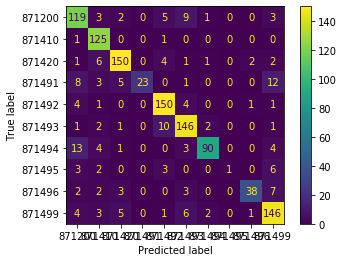

In [96]:
plt.figure(figsize=(30,30))
plot_confusion_matrix(clf1, X_new_counts, y_dev)

plt.show()

### Use TF-IDF on the words in the Product Desc column

In [97]:

count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Desc'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.

tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [98]:
# Create model(naive bayes) and training. 

clf2 = MultinomialNB().fit(X_train_tfidf, y_train)

In [99]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Desc'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf2.predict(X_new_tfidf)

In [100]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

F1 score: 0.7136357770555559
Precision: 0.7807965265485755
Recall: 0.7001330742007502


In [101]:
cm = confusion_matrix(y_dev, predicted)
cm

array([[122,   3,   2,   0,   3,   9,   1,   0,   0,   2],
       [  2, 121,   0,   0,   0,   3,   0,   0,   0,   1],
       [  1,   6, 148,   0,   4,   2,   2,   0,   0,   4],
       [ 10,   3,   7,  17,   1,   3,   0,   0,   0,  11],
       [  6,   0,   0,   0, 145,  10,   0,   0,   0,   0],
       [  3,   1,   1,   0,   7, 149,   2,   0,   0,   0],
       [ 13,   4,   1,   0,   1,   5,  88,   0,   0,   3],
       [  4,   2,   0,   0,   2,   0,   0,   0,   0,   7],
       [  3,   2,   5,   0,   2,   3,   1,   0,  29,  10],
       [  5,   1,   6,   0,   1,   8,   1,   0,   0, 146]])

<Figure size 2160x2160 with 0 Axes>

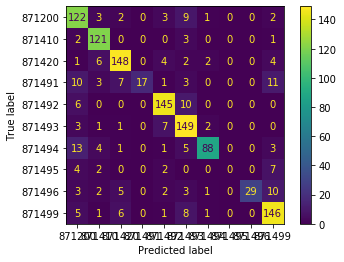

In [102]:
# Plot non-normalized confusion matrix


plt.figure(figsize=(30,30))
plot_confusion_matrix(clf2, X_new_tfidf, y_dev)

plt.show()

### Use BOW on the Merged Description field

In [123]:
# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Merged_Description'])

# # Import TfidfTransformer class.
# # TfidfTransformer transoforms count matrix to tf-idf representation.
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()

# # fit_transform transforms count matrix to tf-idf representation(vector).
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [124]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB().fit(X_train_counts, y_train)

In [125]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Merged_Description'])
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf3.predict(X_new_counts)

In [126]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

F1 score: 0.8969924812030076
Precision: 0.8941605839416059
Recall: 0.9


<Figure size 2160x2160 with 0 Axes>

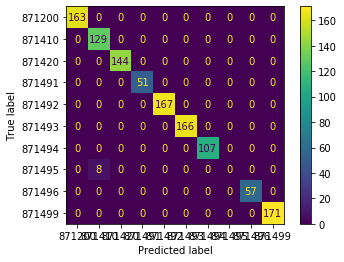

In [128]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(30,30))
plot_confusion_matrix(clf3, X_new_counts, y_dev)

plt.show()

### Use TF-IDF on the Merged Description field

In [103]:
# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Merged_Description'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [104]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train_tfidf, y_train)

In [105]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Merged_Description'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf2.predict(X_new_tfidf)

In [106]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

F1 score: 0.8969924812030076
Precision: 0.8941605839416059
Recall: 0.9


<Figure size 2160x2160 with 0 Axes>

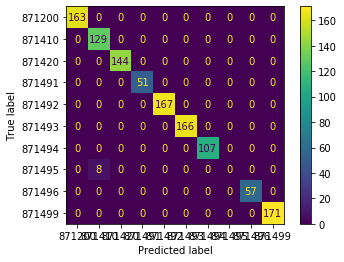

In [107]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(30,30))
plot_confusion_matrix(clf2, X_new_tfidf, y_dev)

plt.show()

In [108]:
cm = confusion_matrix(y_dev, predicted)
cm

array([[163,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 129,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 144,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  51,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 167,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 166,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 107,   0,   0,   0],
       [  0,   8,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  57,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 171]])

### Use the BERT embeddings in the Product Desc column

In [81]:
# Convert the embedding column from list to string
X_train['BERTProduct Desc'] = X_train['BERTProduct Desc'].apply(str).apply(', '.join)
X_train.head()

,Product Desc,Merged_Description,HS_Code,BERTProduct Desc,BERTMerged_Description,NLTKProduct Desc,NLTKMerged_Description
4568,GEAR REAR PTO IDLER GEAR HUB<br/>,"Parts and accessories of vehicles of headings 8711 to 8713 ;Other ;Hubs, other than coaster braking hubs and hub brakes, and free-wheel sprocket-wheels ;Aluminum alloy hubs with a hollow axle and lever-operated quick release mechanism;Hubs ;Three speed;Variable speed (except three speed) with internal gear changing mechanisms ;Two speed;Other;Free-wheel sprocket-wheels;Multiple free-wheel sprockets",871493,"[, 6, 7, 1, 8, ,, , 4, 3, 7, 3, ,, , 1, 3, 8, 6, 6, ,, , 2, 0, 8, 0, ,, , 1, 8, 3, 7, 3, ,, , 2, 0, 9, 9, ,, , 6, 7, 1, 8, ,, , 9, 5, 9, 4, ,, , 1, 0, 2, 6, ,, , 7, 9, 8, 7, ,, , 1, 0, 1, 3, ,, , 1, 0, 2, 8, ]","[3033, 1998, 16611, 1997, 4683, 1997, 5825, 2015, 6584, 14526, 2000, 6584, 17134, 1025, 2060, 1025, 9594, 2015, 1010, 2060, 2084, 16817, 24427, 9594, 2015, 1998, 9594, 13627, 1010, 1998, 2489, 1011, 5217, 11867, 16901, 3388, 1011, 7787, 1025, 13061, 17564, 9594, 2015, 2007, 1037, 8892, 17290, 1998, 15929, 1011, 3498, 4248, 2713, 7337, 1025, 9594, 2015, 1025, 2093, 3177, 1025, 8023, 3177, 1006, 3272, 2093, 3177, 1007, 2007, 4722, 6718, 5278, 10595, 1025, 2048, 3177, 1025, 2060, 1025, 2489, 1011, 5217, 11867, 16901, 3388, 1011, 7787, 1025, 3674, 2489, 1011, 5217, 11867, 16901, 8454]","[GEAR, REAR, PTO, IDLER, GEAR, HUB, <, br/, >]","[Parts, and, accessories, of, vehicles, of, headings, 8711, to, 8713, ;, Other, ;, Hubs, ,, other, than, coaster, braking, hubs, and, hub, brakes, ,, and, free-wheel, sprocket-wheels, ;, Aluminum, alloy, hubs, with, a, hollow, axle, and, lever-operated, quick, release, mechanism, ;, Hubs, ;, Three, speed, ;, Variable, speed, (, except, three, speed, ), with, internal, gear, changing, mechanisms, ;, Two, speed, ;, Other, ;, Free-wheel, sprocket-wheels, ;, Multiple, free-wheel, sprockets]"
1585,NEW MOTORCYCLE EXHAUST PARTS HS CODE:871410 24 CAR,Parts and accessories of vehicles of headings 8711 to 8713 ;Of motorcycles (including mopeds);Saddles and seats;Wheels;Other,871410,"[, 2, 0, 4, 7, ,, , 9, 0, 5, 5, ,, , 1, 5, 0, 9, 5, ,, , 3, 0, 3, 3, ,, , 2, 6, 2, 3, 6, ,, , 3, 6, 4, 2, ,, , 1, 0, 2, 4, ,, , 6, 5, 8, 4, ,, , 1, 6, 9, 3, 2, ,, , 1, 0, 7, 9, 0, ,, , 2, 4, 8, 4, ,, , 2, 4, 8, 2, ]","[3033, 1998, 16611, 1997, 4683, 1997, 5825, 2015, 6584, 14526, 2000, 6584, 17134, 1025, 1997, 18580, 1006, 2164, 9587, 5669, 2015, 1007, 1025, 12279, 2015, 1998, 4272, 1025, 7787, 1025, 2060]","[NEW, MOTORCYCLE, EXHAUST, PARTS, HS, CODE:871410, 24, CAR]","[Parts, and, accessories, of, vehicles, of, headings, 8711, to, 8713, ;, Of, motorcycles, (, including, mopeds, ), ;, Saddles, and, seats, ;, Wheels, ;, Other]"
2161,AUTOMOTIVE PARTS & ACCESSORIES INVOICE#JF1080529BX,Parts and accessories of vehicles of headings 8711 to 8713 ;Of carriages for disabled persons,871420,"[, 1, 2, 9, 4, 5, ,, , 3, 0, 3, 3, ,, , 1, 0, 0, 4, ,, , 1, 6, 6, 1, 1, ,, , 1, 9, 9, 9, ,, , 6, 7, 6, 7, ,, , 6, 6, 1, 0, ,, , 1, 0, 0, 1, ,, , 1, 0, 4, 6, ,, , 2, 5, 4, 6, ,, , 1, 0, 7, 9, 0, ,, , 1, 7, 9, 1, 4, ,, , 2, 5, 7, 4, 6, ,, , 2, 6, 8, 3, ,, , 2, 4, 9, 7, ,, , 2, 5, 9, 5, ]","[3033, 1998, 16611, 1997, 4683, 1997, 5825, 2015, 6584, 14526, 2000, 6584, 17134, 1025, 1997, 17744, 2005, 9776, 5381]","[AUTOMOTIVE, PARTS, &, ACCESSORIES, INVOICE, #, JF1080529BX]","[Parts, and, accessories, of, vehicles, of, headings, 8711, to, 8713, ;, Of, carriages, for, disabled, persons]"
3754,FRAME FORK BRAKE PEDAL RIMTYRE SPOKES SADDLE<br/>,Parts and accessories of vehicles of headings 8711 to 8713 ;Other ;Wheel rims and spokes ;Wheel rims;Spokes,871492,"[, 4, 8, 5, 3, ,, , 9, 2, 9, 2, ,, , 1, 3, 4, 2, 8, ,, , 1, 5, 7, 4, 9, ,, , 1, 1, 4, 1, 8, ,, , 3, 7, 2, 3, ,, , 2, 8, 9, 0, ,, , 3, 7, 6, 4, ,, , 2, 0, 1, 5, ,, , 1, 2, 2, 7, 9, ,, , 1, 0, 2, 6, ,, , 7, 9, 8, 7, ,, , 1, 0, 1, 3, ,, , 1, 0, 2, 8, ]","[3033, 1998, 16611, 1997, 4683, 1997, 5825, 2015, 6584, 14526, 2000, 6584, 17134, 1025, 2060,

In [ ]:
count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Product Desc'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Product Desc'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf.predict(X_new_tfidf)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
plt.figure(figsize=(30,30))
plot_confusion_matrix(clf, X_new_tfidf, y_dev)

plt.show()

## Create functions to make model building easier

In [17]:
results = pd.DataFrame()
results = pd.DataFrame(index = ['Baseline', 'NB-BOW Desc','NB-tfidf Desc', 'KNN-BOW Desc', 'KNN-tfidf Desc', 'LogReg-BOW Desc', 'LogReg-tfidf Desc', 
                                'SVM-BOW Desc', 'SVM-tfidf Desc', 'XGBoost-BOW Desc', 'XGBoost-tfidf Desc', 'RF-BOW Desc', 'RF-tfidf Desc'],
                       columns=['Accuracy'])

In [18]:
results

,Accuracy
Baseline,NaN
NB-BOW Desc,NaN
NB-tfidf Desc,NaN
KNN-BOW Desc,NaN
KNN-tfidf Desc,NaN
LogReg-BOW Desc,NaN
LogReg-tfidf Desc,NaN
SVM-BOW Desc,NaN
SVM-tfidf Desc,NaN
XGBoost-BOW Desc,NaN


In [21]:
results.at['Baseline', 'Accuracy'] = max_value/len(X_train)

In [19]:
def train(classifier, X, y, X_test, y_test):
    ### provide classifier, train and test set
    ### get train/val split
    ### fit on val
    ### test on test
    ### return accuracy score for test
    
    mod = classifier.fit(X, y)
    
    print("Dev set results:")
    X_test_preds = mod.predict(X_test)
    print(classification_report(y_test, X_test_preds) )
    # plot confusion matrix
#     plt.figure(figsize=(30,30))
#     plot_confusion_matrix(mod, y_test, X_test_preds)
#     plt.show()
    # print confusion matrix
    print(confusion_matrix(y_test, X_test_preds))
    return accuracy_score(y_test,X_test_preds)

In [48]:
# Implement Gridsearch for hyperparameter tuning
# defining parameter range 
param_grid = [
              {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'C': [0.1, 1, 10, 100, 1000],'kernel': ['linear']}
             ]
  
grid = GridSearchCV(svm.SVC(decision_function_shape='ovo'), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(Train_X_Tfidf,Train_Y)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

NameError: name 'svm' is not defined

In [25]:
def gridsearch(params, model, X, y):
    """Function that performs gridsearch for hyperparameter tuning"""
    param_grid = params
    

In [20]:
trial1 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial1, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['NB-BOW Desc','Accuracy'] = acc


Dev set results:
              precision    recall  f1-score   support

      390110       0.72      0.71      0.72       200
      390120       0.64      0.77      0.70       200
      390130       0.99      0.92      0.95       200
      390140       0.60      0.91      0.72       181
      390190       0.65      0.65      0.65       200
      390210       0.56      0.59      0.58       200
      390220       0.75      0.85      0.80        96
      390230       0.48      0.70      0.57       200
      390290       0.63      0.77      0.69       192
      390311       0.91      0.80      0.85       200
      390319       0.71      0.88      0.79        95
      390320       0.95      0.84      0.89       200
      390330       0.92      0.79      0.85       200
      390390       0.63      0.79      0.70       200
      390410       0.53      0.90      0.67       188
      390421       0.95      0.45      0.61        47
      390422       1.00      0.20      0.33        55
      3904

In [21]:
trial2 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial2, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['NB-tfidf Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.66      0.79      0.72       200
      390120       0.76      0.72      0.74       200
      390130       0.95      0.93      0.94       200
      390140       0.67      0.86      0.75       181
      390190       0.70      0.67      0.68       200
      390210       0.84      0.57      0.68       200
      390220       0.99      0.78      0.87        96
      390230       0.67      0.69      0.68       200
      390290       0.61      0.85      0.71       192
      390311       0.86      0.87      0.86       200
      390319       0.85      0.72      0.78        95
      390320       0.93      0.91      0.92       200
      390330       0.87      0.85      0.86       200
      390390       0.55      0.82      0.66       200
      390410       0.49      0.90      0.64       188
      390421       1.00      0.38      0.55        47
      390422       1.00      0.25      0.41        55
      3904

In [22]:
trial3 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', KNeighborsClassifier()),
])
 
acc = train(trial3, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['NB-BOW Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.39      0.71      0.50       200
      390120       0.68      0.80      0.73       200
      390130       0.93      0.92      0.92       200
      390140       0.80      0.92      0.86       181
      390190       0.71      0.76      0.74       200
      390210       0.60      0.65      0.62       200
      390220       0.74      0.82      0.78        96
      390230       0.71      0.76      0.73       200
      390290       0.71      0.87      0.78       192
      390311       0.83      0.93      0.87       200
      390319       0.74      0.81      0.77        95
      390320       0.94      0.82      0.88       200
      390330       0.76      0.91      0.83       200
      390390       0.71      0.81      0.76       200
      390410       0.85      0.89      0.87       188
      390421       0.80      0.83      0.81        47
      390422       0.47      0.87      0.61        55
      3904

In [23]:
trial4 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier()),
])
 
acc = train(trial4, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['KNN-BOW Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.64      0.71      0.67       200
      390120       0.71      0.86      0.78       200
      390130       0.94      0.94      0.94       200
      390140       0.81      0.93      0.86       181
      390190       0.74      0.83      0.78       200
      390210       0.61      0.69      0.65       200
      390220       0.81      0.92      0.86        96
      390230       0.80      0.79      0.80       200
      390290       0.76      0.85      0.81       192
      390311       0.80      0.89      0.84       200
      390319       0.83      0.86      0.85        95
      390320       0.91      0.84      0.88       200
      390330       0.83      0.92      0.87       200
      390390       0.77      0.85      0.81       200
      390410       0.87      0.89      0.88       188
      390421       0.75      0.87      0.80        47
      390422       0.61      0.85      0.71        55
      3904

In [24]:
trial5 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', KNeighborsClassifier()),
])
 
acc = train(trial5, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['KNN-tfidf Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.39      0.71      0.50       200
      390120       0.68      0.80      0.73       200
      390130       0.93      0.92      0.92       200
      390140       0.80      0.92      0.86       181
      390190       0.71      0.76      0.74       200
      390210       0.60      0.65      0.62       200
      390220       0.74      0.82      0.78        96
      390230       0.71      0.76      0.73       200
      390290       0.71      0.87      0.78       192
      390311       0.83      0.93      0.87       200
      390319       0.74      0.81      0.77        95
      390320       0.94      0.82      0.88       200
      390330       0.76      0.91      0.83       200
      390390       0.71      0.81      0.76       200
      390410       0.85      0.89      0.87       188
      390421       0.80      0.83      0.81        47
      390422       0.47      0.87      0.61        55
      3904

In [25]:
trial6 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial6, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['LogReg-BOW Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.86      0.81      0.83       200
      390120       0.87      0.85      0.86       200
      390130       0.98      0.95      0.97       200
      390140       0.96      0.92      0.94       181
      390190       0.81      0.80      0.80       200
      390210       0.85      0.80      0.82       200
      390220       0.96      0.90      0.92        96
      390230       0.85      0.77      0.80       200
      390290       0.82      0.83      0.83       192
      390311       0.93      0.93      0.93       200
      390319       0.90      0.81      0.85        95
      390320       0.96      0.96      0.96       200
      390330       0.91      0.96      0.94       200
      390390       0.83      0.82      0.82       200
      390410       0.88      0.89      0.88       188
      390421       0.95      0.77      0.85        47
      390422       0.72      0.84      0.77        55
      3904

In [26]:
trial7 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial7, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['LogReg-tfidf Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.86      0.81      0.83       200
      390120       0.86      0.84      0.85       200
      390130       0.98      0.96      0.97       200
      390140       0.92      0.91      0.91       181
      390190       0.81      0.80      0.80       200
      390210       0.85      0.79      0.82       200
      390220       0.97      0.90      0.93        96
      390230       0.84      0.75      0.79       200
      390290       0.85      0.87      0.86       192
      390311       0.95      0.93      0.94       200
      390319       0.85      0.86      0.86        95
      390320       0.95      0.95      0.95       200
      390330       0.92      0.95      0.94       200
      390390       0.86      0.80      0.83       200
      390410       0.82      0.88      0.85       188
      390421       0.91      0.66      0.77        47
      390422       0.92      0.80      0.85        55
      3904

In [27]:
trial8 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', SVC()),
])
 
acc = train(trial8, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['SVM-BOW Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.74      0.53      0.62       200
      390120       0.89      0.56      0.69       200
      390130       0.76      0.95      0.84       200
      390140       0.80      0.75      0.77       181
      390190       0.67      0.41      0.50       200
      390210       0.82      0.41      0.54       200
      390220       0.84      0.40      0.54        96
      390230       0.90      0.39      0.54       200
      390290       0.71      0.58      0.64       192
      390311       0.95      0.52      0.67       200
      390319       0.76      0.49      0.60        95
      390320       0.99      0.68      0.80       200
      390330       0.92      0.68      0.78       200
      390390       0.66      0.59      0.63       200
      390410       0.72      0.62      0.67       188
      390421       1.00      0.36      0.53        47
      390422       0.00      0.00      0.00        55
      3904

In [29]:
trial9 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC()),
])
 
acc = train(trial9, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['SVM-tfidf Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.87      0.83      0.85       200
      390120       0.91      0.92      0.91       200
      390130       0.99      0.97      0.98       200
      390140       0.94      0.94      0.94       181
      390190       0.81      0.84      0.83       200
      390210       0.92      0.85      0.89       200
      390220       0.98      0.92      0.95        96
      390230       0.90      0.82      0.86       200
      390290       0.88      0.86      0.87       192
      390311       0.98      0.93      0.95       200
      390319       0.88      0.89      0.89        95
      390320       0.98      0.96      0.97       200
      390330       0.92      0.99      0.95       200
      390390       0.89      0.82      0.85       200
      390410       0.89      0.90      0.89       188
      390421       0.95      0.74      0.83        47
      390422       0.93      0.91      0.92        55
      3904

In [28]:
trial10 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial10, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['XGBoost-BOW Desc','Accuracy'] = acc

[00:01:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Dev set results:
              precision    recall  f1-score   support

      390110       0.82      0.80      0.81       200
      390120       0.86      0.90      0.88       200
      390130       0.97      0.97      0.97       200
      390140       0.96      0.96      0.96       181
      390190       0.81      0.81      0.81       200
      390210       0.89      0.85      0.87       200
      390220       0.99      0.90      0.94        96
      390230       0.87      0.82      0.85       200
      390290       0.83      0.89      0.86       192
      390311       0.98      0.93      0.95       200
      390319       0.82      0.84      0.83        95
      390320       0.97      0.96      0.97       200
      390330       0.90    

In [30]:
trial11 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial11, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['XGBoost-tfidf Desc','Accuracy'] = acc

[02:45:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Dev set results:
              precision    recall  f1-score   support

      390110       0.81      0.77      0.79       200
      390120       0.90      0.88      0.89       200
      390130       0.95      0.96      0.96       200
      390140       0.94      0.96      0.95       181
      390190       0.79      0.81      0.80       200
      390210       0.87      0.83      0.85       200
      390220       0.97      0.92      0.94        96
      390230       0.80      0.83      0.82       200
      390290       0.85      0.88      0.86       192
      390311       0.97      0.94      0.96       200
      390319       0.86      0.84      0.85        95
      390320       0.97      0.96      0.96       200
      390330       0.89    

In [31]:
trial12 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial12, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['RF-BOW Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.84      0.79      0.81       200
      390120       0.87      0.91      0.89       200
      390130       0.97      0.97      0.97       200
      390140       0.96      0.96      0.96       181
      390190       0.83      0.87      0.85       200
      390210       0.86      0.85      0.86       200
      390220       0.94      0.92      0.93        96
      390230       0.86      0.87      0.86       200
      390290       0.87      0.91      0.89       192
      390311       0.97      0.96      0.97       200
      390319       0.88      0.88      0.88        95
      390320       0.95      0.95      0.95       200
      390330       0.84      0.97      0.90       200
      390390       0.88      0.87      0.87       200
      390410       0.94      0.94      0.94       188
      390421       0.91      0.85      0.88        47
      390422       0.76      0.91      0.83        55
      3904

In [32]:
trial13 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial13, X_train['Desc'], y_train, X_dev['Desc'], y_dev)

results.at['RF-tfidf Desc','Accuracy'] = acc

Dev set results:
              precision    recall  f1-score   support

      390110       0.83      0.80      0.81       200
      390120       0.86      0.91      0.88       200
      390130       0.97      0.97      0.97       200
      390140       0.93      0.93      0.93       181
      390190       0.84      0.88      0.86       200
      390210       0.87      0.83      0.85       200
      390220       0.98      0.93      0.95        96
      390230       0.81      0.81      0.81       200
      390290       0.85      0.87      0.86       192
      390311       0.96      0.96      0.96       200
      390319       0.88      0.89      0.89        95
      390320       0.94      0.95      0.95       200
      390330       0.86      0.96      0.91       200
      390390       0.85      0.84      0.85       200
      390410       0.93      0.94      0.93       188
      390421       0.93      0.87      0.90        47
      390422       0.81      0.91      0.85        55
      3904

In [33]:
results

,Accuracy
Baseline,NaN
NB-BOW Desc,0.740637
NB-tfidf Desc,0.67661
KNN-BOW Desc,0.757735
KNN-tfidf Desc,0.740637
LogReg-BOW Desc,0.79789
LogReg-tfidf Desc,0.80074
SVM-BOW Desc,0.419948
SVM-tfidf Desc,0.834752
XGBoost-BOW Desc,0.824167


[Text(0, 0, 'Baseline'),
 Text(0, 0, 'NB-BOW Desc'),
 Text(0, 0, 'NB-tfidf Desc'),
 Text(0, 0, 'KNN-BOW Desc'),
 Text(0, 0, 'KNN-tfidf Desc'),
 Text(0, 0, 'LogReg-BOW Desc'),
 Text(0, 0, 'LogReg-tfidf Desc'),
 Text(0, 0, 'SVM-BOW Desc'),
 Text(0, 0, 'SVM-tfidf Desc'),
 Text(0, 0, 'XGBoost-BOW Desc'),
 Text(0, 0, 'XGBoost-tfidf Desc'),
 Text(0, 0, 'RF-BOW Desc'),
 Text(0, 0, 'RF-tfidf Desc')]

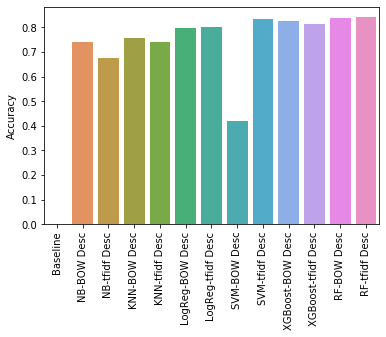

In [34]:
ax = sns.barplot(x=results.index, y=results["Accuracy"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Work with the BERT embeddings

In [73]:
models = {
    'knn' : KNeighborsClassifier(), 'logit' : LogisticRegression(), 'svm': SVC()
}

for model, call in models.items():
    print(f'Training {model}')
    call.fit(X_train['BERT_Product Desc'], y_train)
    pred = call.predict(X_dev['BERT_Product Desc'], y_dev)
    print(accuracy_score(y_dev, pred))
    print()

Training knn


ValueError: setting an array element with a sequence.